In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as ps
import joblib
import warnings
warnings.filterwarnings('ignore')

In [44]:
df_white = pd.read_csv("../data/wine-white.csv", delimiter=';')
df_white["color"] = "white"
df_white.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white


In [45]:
df_red = pd.read_csv("../data/wine-red.csv")
df_red["color"] = "red"
df_red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [46]:
#union de  las  datos de vino tinto y blanco juntos
df = df_white.append(df_red, ignore_index = True)
print(f'Composicion del Data Frame (rows, columns): {df.shape}')
df

Composicion del Data Frame (rows, columns): (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [47]:
df = df.reindex(columns=["color","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])
df.rename(columns={'color':'wine_type'},inplace=True)
df.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [48]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [49]:
len(df.quality.unique())

7

In [50]:
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
wine_type,0,0.0
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0


In [51]:
def get_missing_values(df):
    values = {}
    for feat in df.columns:
        if df[feat].isna().any():
            values[feat] = round(df[feat].mean(),2)
    return values

In [52]:

values = get_missing_values(df)
values 

{}

In [53]:
df.fillna(value=values,inplace=True)

<AxesSubplot:>

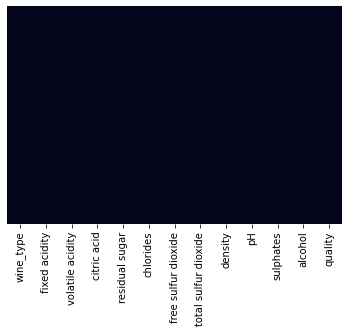

In [54]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

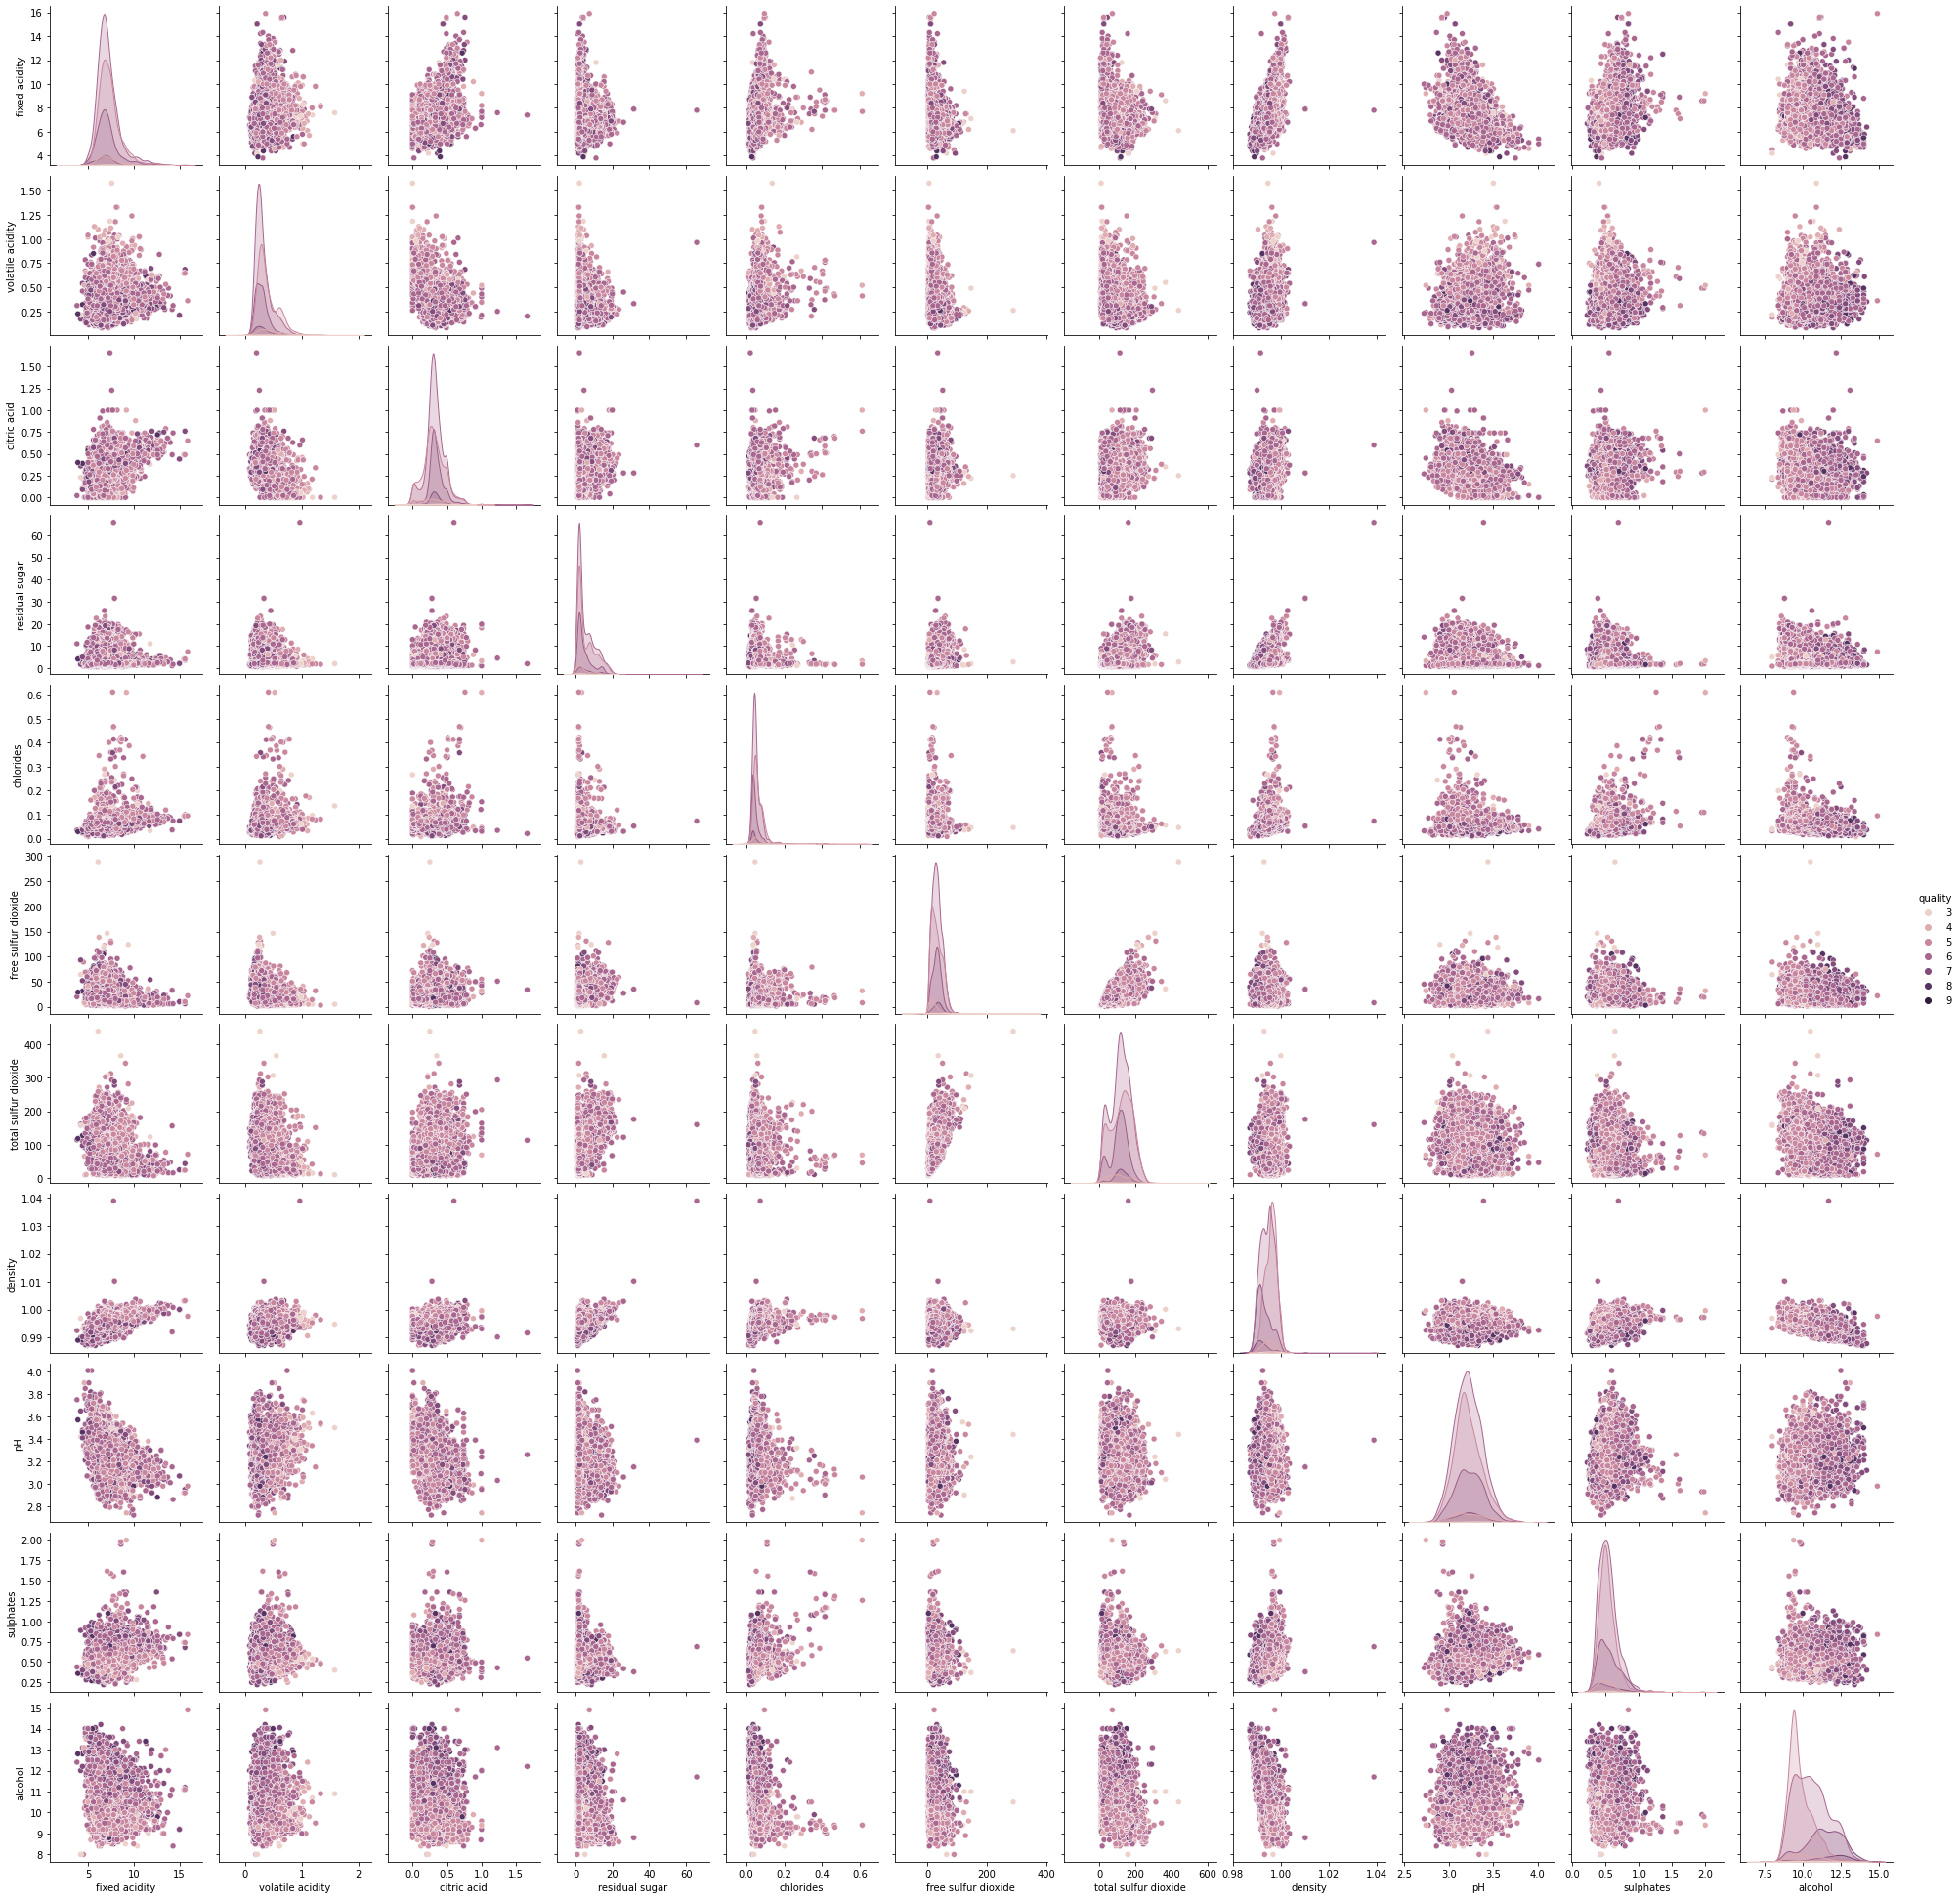

In [13]:
sns.pairplot(df, hue="quality")

Text(0, 0.5, 'Diagrama de Correlacion')

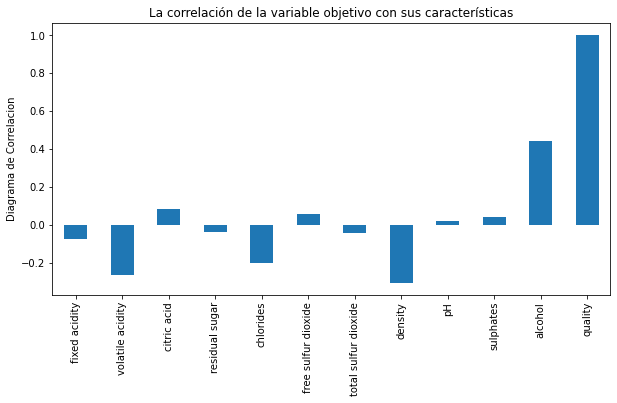

In [55]:
plt.figure(figsize=(10,5))
ax = df.corr()['quality'].plot(kind='bar',title='La correlación de la variable objetivo con sus características')
ax.set_ylabel('Diagrama de Correlacion')

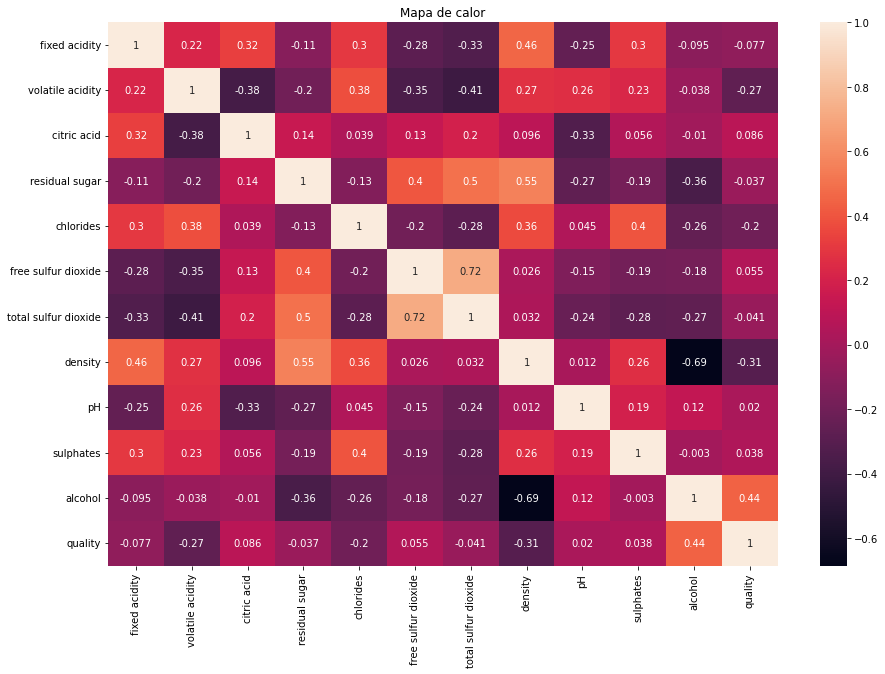

In [56]:
plt.figure(figsize=(15,10));plt.subplot(title = 'Mapa de calor')
sns.heatmap(df.corr(),annot=True);

In [57]:
df.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [58]:
df.wine_type = df.wine_type.map({'white':0, 'red':1})


In [59]:
df.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Text(0.5, 1.0, 'Calidad del vino')

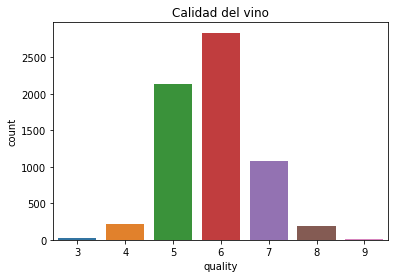

In [60]:
sns.countplot(data=df, x="quality").set_title("Calidad del vino")

In [61]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
X = df.drop(columns=['quality'],axis=1) 
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [63]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [64]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Comparacion', '*'*40, 
      'Accuracy Score of Train Model : {:.3f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.3f}'.format(test_accuracy), sep='-\n')

Comparacion-
****************************************-
Accuracy Score of Train Model : 0.473-
Accuracy Score of Test  Model : 0.447


In [65]:
df_bins3= df.copy()

In [66]:
bins = [0,3,6,10]

# 'bajo'=0,'mediano'=1, 'alto'=2
labels = [0,1,2]

df_bins3['quality_range']= pd.cut(x=df_bins3['quality'], bins=bins, labels=labels)



print(df_bins3[['quality_range','quality']].head(5))

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


Text(0.5, 1.0, 'Calidad del vino')

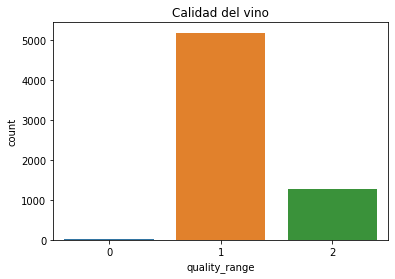

In [67]:
sns.countplot(data=df_bins3, x="quality_range").set_title("Calidad del vino")

In [68]:
df_bins3 = df_bins3.drop(columns=['quality'],axis=1).copy()

In [69]:
X = df_bins3.drop(columns=['quality_range'],axis=1) 
y = df_bins3.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [70]:
X.columns

Index(['wine_type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [71]:
lr    = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [73]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Comparacion', '*'*40, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

Comparacion
****************************************
Accuracy Score of Train Model : 0.80
Accuracy Score of Test  Model : 0.80


# ![title](../image/AutoML.jpg)

### [TPOT](http://epistasislab.github.io/tpot/api/)

TPOTClassifier buscará en una amplia gama de algoritmos de clasificación supervisados, transformadores y sus parámetros. 

Utilizamos el **TPOTClassifier** y no el **TPOTRegressor** pues el algoritmo resultante es un numero limitado de clases

In [74]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=10,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [ ]:
AutoML.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/60 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.857803731398534


In [ ]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=10,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [ ]:
AutoML.fit(X,y)
#Guardando modelo para despues utilizarlo
with open('model-v1.joblib', 'wb') as f:
    joblib.dump(lr,f)

### [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Calculamos la confusion de la matriz para evaluar y predecir la precisión de una clasificación.

In [ ]:
from sklearn.metrics import confusion_matrix as cm

predictions = AutoML.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
plt.figure(figsize=(12,8))
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicion de Valores',size = 15)
plt.ylabel('Valor actual',size = 15)
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
AutoML.export('pipeline.py')